In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
%matplotlib inline

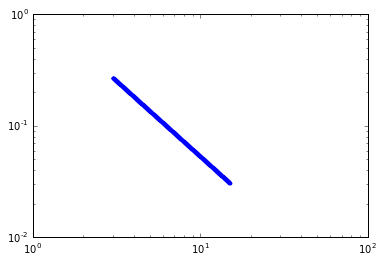

In [93]:
def powerLH(m_min, m_max, M, alpha):
    c = (1.-alpha)/(m_max**(1-alpha)-m_min**(1-alpha))
    P = c*M**(-alpha)
    return P

testM = np.logspace(np.log10(3), np.log10(15), 1000)
test = powerLH(3, 15, testM, 1.35)
plt.loglog(testM,test,'.')


''' The model power-law'''

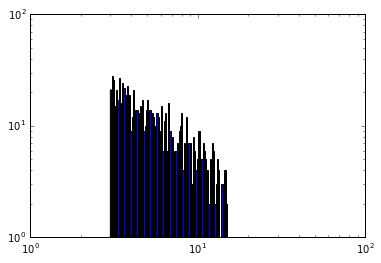

In [66]:
randmasses = np.random.choice(testM, 1000, p = test/np.sum(test))
n, bins, patches = plt.hist(randmasses, bins = np.logspace(np.log10(3), np.log10(15), 100))
plt.yscale('log')
plt.xscale('log')
error = np.sqrt(n)+1.

''' The histogram of random masses'''

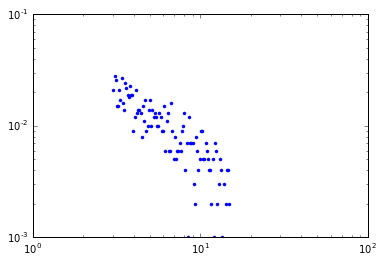

In [67]:
binavg = (bins[:-1]+bins[1:])/2.
plt.plot(binavg,n/sum(n),'.')
plt.yscale('log')
plt.xscale('log')
error = np.sqrt(n)+1


''' The histogram, again, as merely data points'''

In [120]:
import emcee

def powerLHMC(theta, M, N):
    if theta[0] < 3:
        return -np.inf
    if theta[0] > 100:
        return -np.inf
    if theta[1] < 0:
        return -np.inf
    c = (1.-theta[1])/(-3.**(1-theta[1])+theta[0]**(1-theta[1]))
    P = -.5*np.sum(((c*M**(-theta[1])-N)**2.))
    return P

ndim, nwalkers = 2, 100
pos = [4+1e-2*np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, powerLHMC, args = [binavg, n])
sampler.run_mcmc(pos, 10000)


(array([[ 3.04445996,  1.18305545],
        [ 3.04446703,  1.19986289],
        [ 3.04392182,  1.21168855],
        [ 3.04384181,  1.19802692],
        [ 3.04412097,  1.1986529 ],
        [ 3.04453315,  1.1706368 ],
        [ 3.0435789 ,  1.23635276],
        [ 3.04465589,  1.19421184],
        [ 3.04337455,  1.22084688],
        [ 3.04515885,  1.16347966],
        [ 3.04366732,  1.23603076],
        [ 3.04351804,  1.21160945],
        [ 3.04315796,  1.24203188],
        [ 3.0451469 ,  1.18670657],
        [ 3.04355835,  1.24115538],
        [ 3.04379777,  1.17398415],
        [ 3.04257053,  1.22738826],
        [ 3.04403902,  1.21766611],
        [ 3.04425473,  1.20536384],
        [ 3.04373661,  1.21128627],
        [ 3.04417652,  1.19081602],
        [ 3.04453185,  1.19180827],
        [ 3.04417296,  1.19924455],
        [ 3.04312431,  1.2323951 ],
        [ 3.04333731,  1.2145087 ],
        [ 3.04446727,  1.18994593],
        [ 3.04442414,  1.22673897],
        [ 3.04425211,  1.202

[-7.5827247  -7.60948969 -7.60948969 ..., -0.19750598 -0.16956122
 -0.06716932]


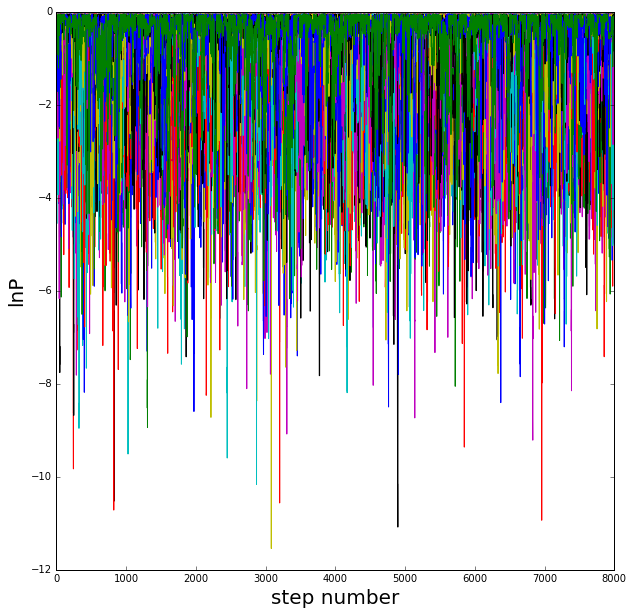

In [88]:
plt.figure(figsize = (10,10))
[plt.plot(sampler.lnprobability[i,2000:]) for i in range(100)]
plt.xlabel('step number', fontsize = 20)
plt.ylabel('lnP', fontsize = 20)
print(sampler.lnprobability[1,0:])

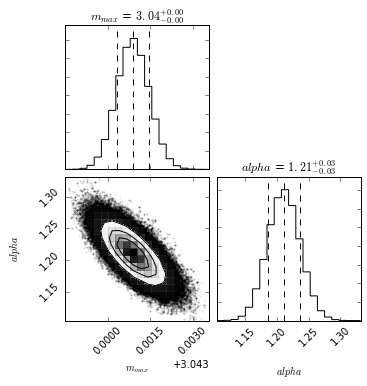

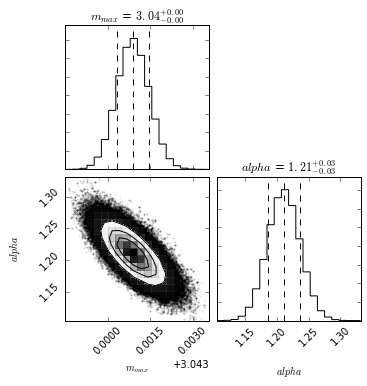

In [122]:
import corner

samples = sampler.chain[:,2000:, :].reshape((-1, ndim))
corner.corner(samples, labels=['$m_{max}$', '$alpha$'], fontsize = 30, show_titles = True, quantiles=[0.16, 0.5, 0.84])


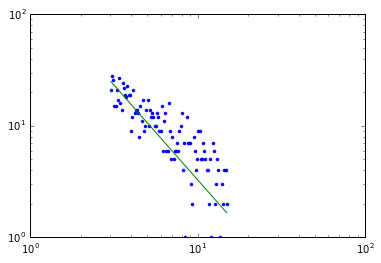

In [121]:
m_max = 3.04
alpha = 1.21

plt.loglog(binavg, n, '.')
c = (1-alpha)/(-3.**(1-alpha)+m_max**(1-alpha))
plt.loglog(binavg, c*binavg**(-alpha))

'''Best fit parameters and the histogram'''

With 1000 points, I'm still not recovering alpha entirely. The input value is ~4 sigma away from the mean value given in this emcee run. The M_max is confusing. The difference likely comes from the fact that there is a relation between bin size, number of stars in a given mass bin, and therefore the normalization. What it is I don't quite know. There is probably a relation that I haven't quite worked out yet between bin size. number of masses, and the normalization. On to the rest of the problem!

In [ ]:
# N = 10

testM = np.logspace(np.log10(3), np.log10(15), 1000)
test = powerLH(3, 15, testM, 1.35)


randmasses10 = np.random.choice(testM, 100, p = test/np.sum(test))
n10, bins10, patches = plt.hist(randmasses10, bins = np.logspace(np.log10(3), np.log10(15), 1000))
plt.yscale('log')
plt.xscale('log')

binavg10 = (bins10[:-1]+bins10[1:])/2.


ndim, nwalkers = 2, 100
pos10 = [4+1e-2*np.random.randn(ndim) for i in range(nwalkers)]

def powerLHMC(theta, M, N):
    if theta[0] < 3:
        return -np.inf
    if theta[0] > 100:
        return -np.inf
    if theta[1] < 0:
        return -np.inf
    c = (1.-theta[1])/(-3.**(1-theta[1])+theta[0]**(1-theta[1]))
    P = -.5*np.sum(((c*M**(-theta[1])-N)**2.))
    return P

sampler10 = emcee.EnsembleSampler(nwalkers, ndim, powerLHMC, args = [binavg10, n10])
sampler10.run_mcmc(pos, 5000)

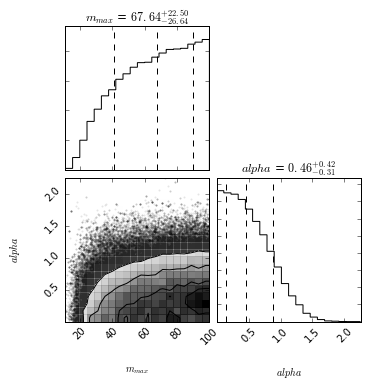

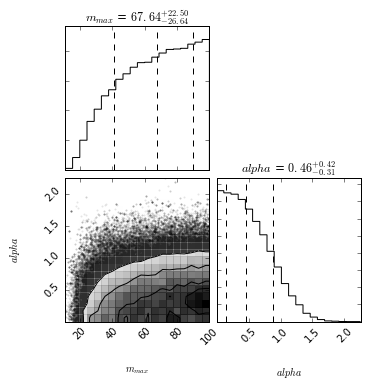

In [108]:
import corner

samples10 = sampler10.chain[:,2000:, :].reshape((-1, ndim))
corner.corner(samples10, labels=['$m_{max}$', '$alpha$'], fontsize = 30, show_titles = True, quantiles=[0.16, 0.5, 0.84])


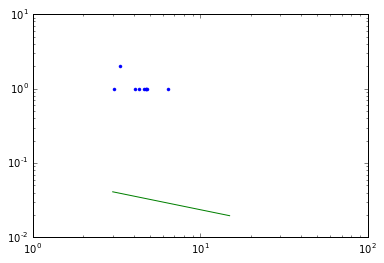

In [109]:
m_max10 = 67.6
alpha10 = .46

plt.plot(binavg10,n10,'.')
plt.yscale('log')
plt.xscale('log')

c10 = (1-alpha10)/(-3.**(1-alpha10)+m_max10**(1-alpha10))
plt.loglog(binavg10, c10*binavg10**(-alpha10))

As one can see, the line is trying to split the difference between bins of 1 and 0 members. Not a good fit, and probably impossible to get a good fit!

(array([[  6.04062956e+01,   2.16794718e+00],
        [  9.89912046e+01,   1.10958444e+00],
        [  8.85930269e+01,   2.27547097e+00],
        [  8.77804787e+01,   1.92102651e+00],
        [  8.24832838e+01,   2.09348831e+00],
        [  3.69887362e+01,   1.59368367e+00],
        [  3.93600567e+01,   1.84788222e+00],
        [  7.56328278e+01,   2.20295888e+00],
        [  1.12291261e+01,   1.51100499e+00],
        [  7.90040064e+01,   1.57638739e+00],
        [  1.62602993e+01,   3.91724479e-01],
        [  9.03434757e+01,   1.35128630e+00],
        [  2.80751114e+01,   1.77218220e+00],
        [  1.28371383e+01,   1.04161758e+00],
        [  4.31753228e+01,   2.32374695e+00],
        [  8.38064524e+01,   1.97796138e+00],
        [  4.04517995e+01,   1.56677090e+00],
        [  2.60112550e+01,   1.90962205e+00],
        [  5.38411994e+01,   2.17113731e+00],
        [  9.80441431e+01,   1.59340765e+00],
        [  2.68514139e+01,   1.31473013e+00],
        [  6.92071815e+01,   1.333

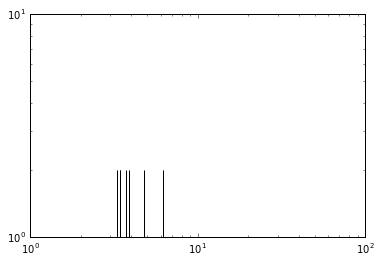

In [105]:
# for N = 100

testM = np.logspace(np.log10(3), np.log10(15), 1000)
test = powerLH(3, 15, testM, 1.35)


randmasses100 = np.random.choice(testM, 100, p = test/np.sum(test))
n100, bins100, patches = plt.hist(randmasses100, bins = np.logspace(np.log10(3), np.log10(15), 1000))
plt.yscale('log')
plt.xscale('log')

binavg100 = (bins100[:-1]+bins100[1:])/2.


ndim, nwalkers = 2, 100
pos100 = [4+1e-2*np.random.randn(ndim) for i in range(nwalkers)]

def powerLHMC(theta, M, N):
    if theta[0] < 3:
        return -np.inf
    if theta[0] > 100:
        return -np.inf
    if theta[1] < 0:
        return -np.inf
    c = (1.-theta[1])/(-3.**(1-theta[1])+theta[0]**(1-theta[1]))
    P = -.5*np.sum(((c*M**(-theta[1])-N)**2.))
    return P

sampler100 = emcee.EnsembleSampler(nwalkers, ndim, powerLHMC, args = [binavg100, n100])
sampler100.run_mcmc(pos, 5000)


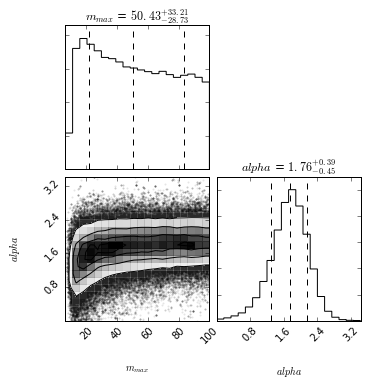

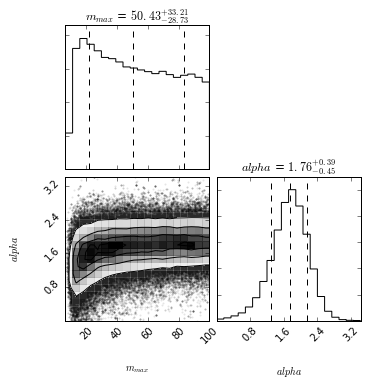

In [106]:
import corner

samples100 = sampler100.chain[:,2000:, :].reshape((-1, ndim))
corner.corner(samples100, labels=['$m_{max}$', '$alpha$'], fontsize = 30, show_titles = True, quantiles=[0.16, 0.5, 0.84])


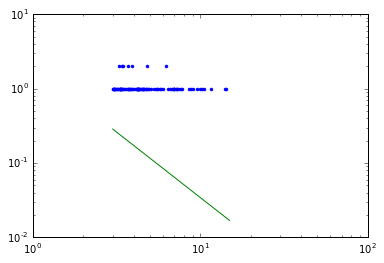

In [111]:
m_max100 = 50.43
alpha100 = 1.76

plt.plot(binavg10,n100,'.') #binavg10 and binavg100 are the same
plt.yscale('log')
plt.xscale('log')

c100 = (1-alpha100)/(-3.**(1-alpha100)+m_max100**(1-alpha100))
plt.loglog(binavg10, c100*binavg10**(-alpha100))

The slope is there now, but there is still a problem of getting the continuum!

(array([[ 3.04139274,  1.33295653],
        [ 3.04127202,  1.34207914],
        [ 3.0415422 ,  1.33539768],
        [ 3.04146346,  1.33946327],
        [ 3.04112074,  1.34347384],
        [ 3.04148464,  1.32503176],
        [ 3.04157492,  1.33854078],
        [ 3.04128295,  1.34349511],
        [ 3.04120875,  1.35350674],
        [ 3.04163403,  1.33453516],
        [ 3.04147801,  1.34174007],
        [ 3.04151918,  1.33736852],
        [ 3.04141641,  1.33351892],
        [ 3.04146821,  1.33282711],
        [ 3.04137688,  1.34106982],
        [ 3.04126804,  1.34268674],
        [ 3.04149324,  1.34165245],
        [ 3.04132968,  1.34552998],
        [ 3.04145971,  1.32838419],
        [ 3.04166003,  1.33795535],
        [ 3.0412783 ,  1.34498261],
        [ 3.04111097,  1.34820086],
        [ 3.0414062 ,  1.33960802],
        [ 3.04128364,  1.33915067],
        [ 3.04146113,  1.3471682 ],
        [ 3.04160477,  1.32792676],
        [ 3.04115668,  1.35678937],
        [ 3.04149602,  1.325

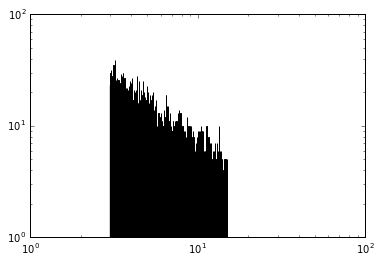

In [117]:
# for N = 10000

testM = np.logspace(np.log10(3), np.log10(15), 1000)
test = powerLH(3, 15, testM, 1.35)


randmasses10000 = np.random.choice(testM, 10000, p = test/np.sum(test))
n10000, bins10000, patches = plt.hist(randmasses10000, bins = np.logspace(np.log10(3), np.log10(15), 1000))
plt.yscale('log')
plt.xscale('log')

binavg10000 = (bins10000[:-1]+bins10000[1:])/2.


ndim, nwalkers = 2, 100
pos10000 = [4+1e-2*np.random.randn(ndim) for i in range(nwalkers)]

def powerLHMC(theta, M, N):
    if theta[0] < 3:
        return -np.inf
    if theta[0] > 100:
        return -np.inf
    if theta[1] < 0:
        return -np.inf
    c = (1.-theta[1])/(-3.**(1-theta[1])+theta[0]**(1-theta[1]))
    P = -.5*np.sum(((c*M**(-theta[1])-N)**2.))
    return P

sampler10000 = emcee.EnsembleSampler(nwalkers, ndim, powerLHMC, args = [binavg10000, n10000])
sampler10000.run_mcmc(pos, 5000)


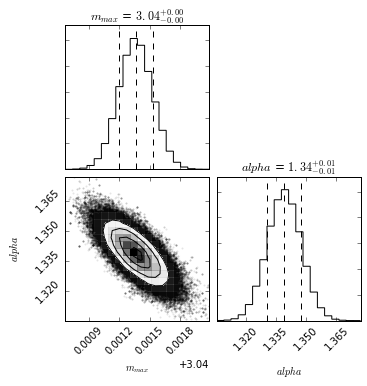

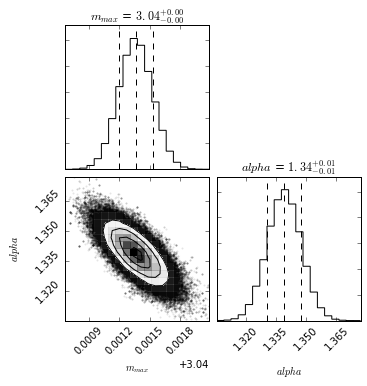

In [118]:
import corner

samples10000 = sampler10000.chain[:,2000:, :].reshape((-1, ndim))
corner.corner(samples10000, labels=['$m_{max}$', '$alpha$'], fontsize = 30, show_titles = True, quantiles=[0.16, 0.5, 0.84])


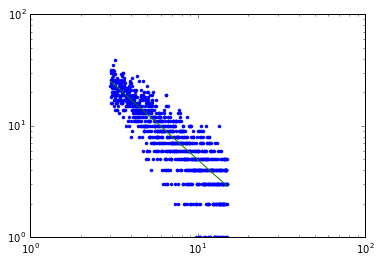

In [119]:
m_max10000 = 3.04
alpha10000 = 1.35

plt.plot(binavg10000,n10000,'.') 
plt.yscale('log')
plt.xscale('log')

c10000 = (1-alpha10000)/(-3.**(1-alpha10000)+m_max10000**(1-alpha10000))
plt.loglog(binavg10000, c10000*binavg10000**(-alpha10000))

So I think there must be some error in terms of how I'm implementing M_max, because here we have something that looks like a good fit with very tight constraints on both M_max and alpha, and alpha looks almost perfect. What might 3.04 imply??? Could it just be that I need to be smarter with my bins? I wish I could figure out the answer in time.